<div style="background-color: #B4D4FF; padding: 30px; border-radius: 7px; color: #001B79; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;">🏦 CREDIT RISK PREDICTION</h1>
</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<!-- Bank Money Theme -->
<div style="border-radius: 0px; border: 2px solid #001B79; padding: 15px; background-color: #B4D4FF; font-size: 170%; text-align: center; color: #11235A; font-weight: bold;">
   Table of Contents
</div>


* [1. 💾 Import Libraries](#1.-Import-Libraries) 

* [2. 📑 Read and Explain Dataset](#read)

* [3. 📊 Exploratory Data Analysis](#3.-Exploratory-Data-Analysis) 

* [4. 🎯 Dealing with Outliers](#4.-Dealing-with-Outliers)

* [5. 💡 Feature Engineering](#5.-Feature-Engineering)

* [6. 🛠️ Data Preprocessing](#6.-Data-Preprocessing)

* [7. 🌴 ML Classification Models](#7.-ML-Classification-Models)

* [8. ⚙️ Hyperparameter Tuning](#8.-Hyperparameter-Tuning)

<a id="#1.-Import-Libraries">

<div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:170%; text-align:center;color: #11235A;; font-weight: bold;">1. Import Libraries</div>

In [51]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os

import warnings
warnings.filterwarnings("ignore")

## <a id="read"></a><div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">2. Read and Explain Dataset</div>

In [52]:
df_cr = pd.read_csv("credit_risk_dataset.csv")
df_cr.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1


In [53]:
df_cr.sample(20)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
4757,MORTGAGE,HOMEIMPROVEMENT,A,N,42000,25,3.0,10000,5.42,0,0.24,0
31575,RENT,MEDICAL,A,N,35416,40,15.0,2000,6.91,0,0.06,0
6767,RENT,HOMEIMPROVEMENT,B,N,18000,21,5.0,7000,11.14,0,0.39,1
25698,MORTGAGE,MEDICAL,A,N,90000,27,6.0,24400,8.90,0,0.27,0
26820,MORTGAGE,PERSONAL,E,N,103000,32,0.0,33000,18.64,0,0.32,1
27145,MORTGAGE,MEDICAL,B,N,125000,33,17.0,8800,10.59,0,0.07,0
23178,MORTGAGE,DEBTCONSOLIDATION,C,N,60000,29,7.0,15000,12.87,0,0.25,0
29209,RENT,EDUCATION,B,N,180000,36,5.0,24000,9.99,0,0.13,0
15071,RENT,VENTURE,D,N,51000,21,5.0,1600,15.62,0,0.03,1
21598,MORTGAGE,MEDICAL,B,N,49000,28,5.0,4750,10.25,0,0.10,0


## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">Feature Descriptions</div>


<div style="background-color: #B4D4FF; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left; color: #11235A;">
    <ul>
        <li><b>person_age:</b> Age of the individual applying for the loan.</li>
        <li><b>person_income:</b> Annual income of the individual.</li>
        <li><b>person_home_ownership:</b> Type of home ownership of the individual.
            <ul>
                <li>rent: The individual is currently renting a property.</li>
                <li>mortgage: The individual has a mortgage on the property they own.</li>
                <li>own: The individual owns their home outright.</li>
                <li>other: Other categories of home ownership that may be specific to the dataset.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Employment length of the individual in years.</li>
        <li><b>loan_intent:</b> The intent behind the loan application.</li>
        <li><b>loan_grade:</b> The grade assigned to the loan based on the creditworthiness of the borrower.
            <ul>
                <li>A: The borrower has a high creditworthiness, indicating low risk.</li>
                <li>B: The borrower is relatively low-risk, but not as creditworthy as Grade A.</li>
                <li>C: The borrower's creditworthiness is moderate.</li>
                <li>D: The borrower is considered to have higher risk compared to previous grades.</li>
                <li>E: The borrower's creditworthiness is lower, indicating a higher risk.</li>
                <li>F: The borrower poses a significant credit risk.</li>
                <li>G: The borrower's creditworthiness is the lowest, signifying the highest risk.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> The loan amount requested by the individual.</li>
        <li><b>loan_int_rate:</b> The interest rate associated with the loan.</li>
        <li><b>loan_status:</b> Loan status, where 0 indicates non-default and 1 indicates default.
            <ul>
                <li>0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.</li>
                <li>1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b>  The proportion of an individual's income that is being allocated towards repaying the loan.</li>
        <li><b>cb_person_default_on_file:</b> Historical default of the individual as per credit bureau records.
            <ul>
                <li>Y: The individual has a history of defaults on their credit file.</li>
                <li>N: The individual does not have any history of defaults.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> The length of credit history for the individual.</li>
    </ul>
</div>


In [54]:
df_cr.shape

(32581, 12)

In [55]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_home_ownership       32581 non-null  object 
 1   loan_intent                 32581 non-null  object 
 2   loan_grade                  32581 non-null  object 
 3   cb_person_default_on_file   32581 non-null  object 
 4   person_income               32581 non-null  int64  
 5   person_age                  32581 non-null  int64  
 6   person_emp_length           31686 non-null  float64
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   cb_person_cred_hist_length  32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [56]:
df_cr.describe()

,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
count,3.258100e+04,32581.000000,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,27.719254,4.789686,9589.371106,11.011695,1.030509,0.170203,0.218164
std,6.198312e+04,6.206590,4.142630,6322.086646,3.240459,2.806561,0.106782,0.413006
min,4.000000e+03,20.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000
25%,3.850000e+04,23.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,0.000000
50%,5.500000e+04,26.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,0.000000
75%,7.920000e+04,30.000000,7.000000,12200.000000,13.470000,0.000000,0.230000,0.000000
max,6.000000e+06,94.000000,123.000000,35000.000000,23.220000,30.000000,0.830000,1.000000


In [57]:
df_cr.isnull().sum()[df_cr.isnull().sum() > 0]

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [58]:
df_cr.nunique()

person_home_ownership            4
loan_intent                      6
loan_grade                       7
cb_person_default_on_file        2
person_income                 4295
person_age                      56
person_emp_length               36
loan_amnt                      753
loan_int_rate                  348
cb_person_cred_hist_length      30
loan_percent_income             77
loan_status                      2
dtype: int64

In [59]:
df_cr["loan_status"].value_counts(normalize= True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

In [60]:
df_cr.duplicated().sum()

552

In [61]:
df_cr.drop_duplicates(inplace=True)

### Defining numerical and categorical columns

In [62]:
num_col = [col for col in df_cr.columns if df_cr[col].dtypes != "object"]
cat_col = [col for col in df_cr.columns if df_cr[col].dtypes == "object"]

In [63]:
df_cr[num_col].corr()

,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
person_income,1.000000,0.126405,0.134245,0.267089,0.002244,0.026959,-0.253772,-0.144886
person_age,0.126405,1.000000,0.166604,0.051726,0.012586,0.235933,-0.041809,-0.020959
person_emp_length,0.134245,0.166604,1.000000,0.113383,-0.055743,0.012736,-0.054467,-0.083111
loan_amnt,0.267089,0.051726,0.113383,1.000000,0.147176,0.044071,0.572308,0.105012
loan_int_rate,0.002244,0.012586,-0.055743,0.147176,1.000000,0.401613,0.119664,0.335988
cb_person_cred_hist_length,0.026959,0.235933,0.012736,0.044071,0.401613,1.000000,0.020247,0.139130
loan_percent_income,-0.253772,-0.041809,-0.054467,0.572308,0.119664,0.020247,1.000000,0.378922
loan_status,-0.144886,-0.020959,-0.083111,0.105012,0.335988,0.139130,0.378922,1.000000


## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">3. Exploratory Data Analysis</div>

In [64]:
# Maximum and minimum age

max_age = df_cr["person_age"].max()
min_age = df_cr["person_age"].min()

print(f"maximum Age {max_age}")
print(f"minimum Age {min_age}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df_cr['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([19, 26, 36, 46, 56, 66, 76, 86, 96])


maximum Age 94
minimum Age 20
Age between 20 and 26: Number of people 17518
Age between 27 and 36: Number of people 11649
Age between 37 and 46: Number of people 2326
Age between 47 and 56: Number of people 420
Age between 57 and 66: Number of people 96
Age between 67 and 76: Number of people 16
Age between 77 and 86: Number of people 3
Age between 87 and 96: Number of people 1


The majority of individuals seeking loans are relatively young, with over 15,000 applicants aged between 20 and 26. Conversely, there is a notable decline in the number of applicants as age increases, with only a few applicants aged 77 to 86 and none aged 87 to 96.Given that there are only four individuals aged greater than 76 years, their presence may introduce bias into the dataset. Therefore, it would be advisable to remove them.

In [81]:
#max and min income
max_ = df_cr['person_income'].max()
min_ = df_cr['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df_cr['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 1960
Income between 25001 and 50000: Number of people 10144
Income between 50001 and 75000: Number of people 8501
Income between 75001 and 100000: Number of people 4174
Income between 100001 and inf: Number of people 3722


The income distribution of loan applicants shows a majority earning between $25,001 and $50,000, with 10,144 individuals falling within this bracket. There is a gradual decrease in the number of applicants as income increases, with fewer applicants earning below $25,000 and above $75,000.

In [82]:
#min and max loan amount
max_loan_amount = df_cr['loan_amnt'].max()
min_loan_amount = df_cr['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df_cr['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 8139
Loan Amount between 5001 and 10000: Number of people 10565
Loan Amount between 10001 and 15000: Number of people 5399
Loan Amount between 15001 and inf: Number of people 4398



The loan amount distribution reveals a significant portion of applicants seeking loans between $5,001 and $10,000, with 10,565 individuals falling within this range. There is a gradual decline in the number of applicants as loan amounts increase beyond $10,000, with a minimum loan amount of $500 and a maximum loan amount of $35,000.

In [83]:
df_cr["person_home_ownership"].value_counts()

RENT        14498
MORTGAGE    11736
OWN          2174
OTHER          93
Name: person_home_ownership, dtype: int64

The distribution of home ownership status among applicants indicates that the majority (14,498) are renters, followed by individuals with mortgages (11,736). There are fewer applicants who own their homes (2,174), while a very small number (93) fall into the "Other" category.

## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">3. Exploratory Data Analysis</div>

In [167]:
fig = px.imshow(round(df_cr[num_col].corr(), 2), text_auto = True, color_continuous_scale='Blues')
fig.update_layout(width=1000, height=1000)  # Adjust width and height as needed
fig.show()

In [85]:
# Pie chart of person_home_ownership

fig = px.pie(values = df_cr["person_home_ownership"].value_counts(), names = df_cr["person_home_ownership"].value_counts().index, color_discrete_sequence=px.colors.sequential.Blues_r, title = "Preson Home Ownership", width=900, height=500)
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=1)))
fig.show()

The majority of individuals in our dataset, comprising about half, reside in rented accommodations rather than owning their own homes. Furthermore, more than 40% of individuals have their houses mortgaged.

In [86]:
# Pie chart of loan grade

fig = px.pie(values = df_cr["loan_grade"].value_counts(), names = df_cr["loan_grade"].value_counts().index, color_discrete_sequence=px.colors.sequential.Blues_r, title = "Loan Grade", width=900, height=500)

fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))
fig.show()

The loan grades distribution highlights a predominant concentration in grades A and B, with 9345 and 9094 instances, respectively, suggesting a lower risk profile for these loans. Grade C follows closely with 5682 instances. As the grades descend, the number of loans decreases, indicating a decreasing trend in loan quality. Grades D, E, F, and G represent progressively fewer instances, with 3243, 869, 209, and 59 loans, respectively, reflecting a higher risk potential in these categories.

In [87]:
# histogram of loan intent

fig = px.histogram(df_cr, x = "loan_intent", histnorm="percent", text_auto=".2f", template="presentation", title = "Loan Intent",  color_discrete_sequence=px.colors.sequential.Blues_r, width=900, height=600)

fig.update_layout()
fig.show()

The data indicates that the highest proportion of individuals opted for educational loans, followed closely by medical loans. Additionally, there appears to be a comparable ratio between personal and venture loans, suggesting similar levels of interest in these two categories./

In [88]:
fig=px.histogram(df_cr, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Blues_r, width=900, height=600)
fig.update_layout()
fig.show()

The majority of individuals in the dataset have not defaulted on any loans. However, there is a smaller subset of individuals who have defaulted on loans between 3 to 8 times.

In [89]:
grouped_df = df_cr.groupby(['person_age', 'loan_status']).size().reset_index(name='count')

# Plot the grouped bar chart
fig = px.bar(grouped_df, 
             x='person_age', 
             y='count', 
             color='loan_status', 
             color_discrete_sequence=px.colors.sequential.Blues_r, 
             width=900, 
             height=600, 
             title='Age Distribution of Customers by Loan Status',
             template='presentation')
fig.show()

In our dataset, the majority of individuals fall within the age range of 20 to 35 years old, and it appears that most loans are taken by individuals within this age group.

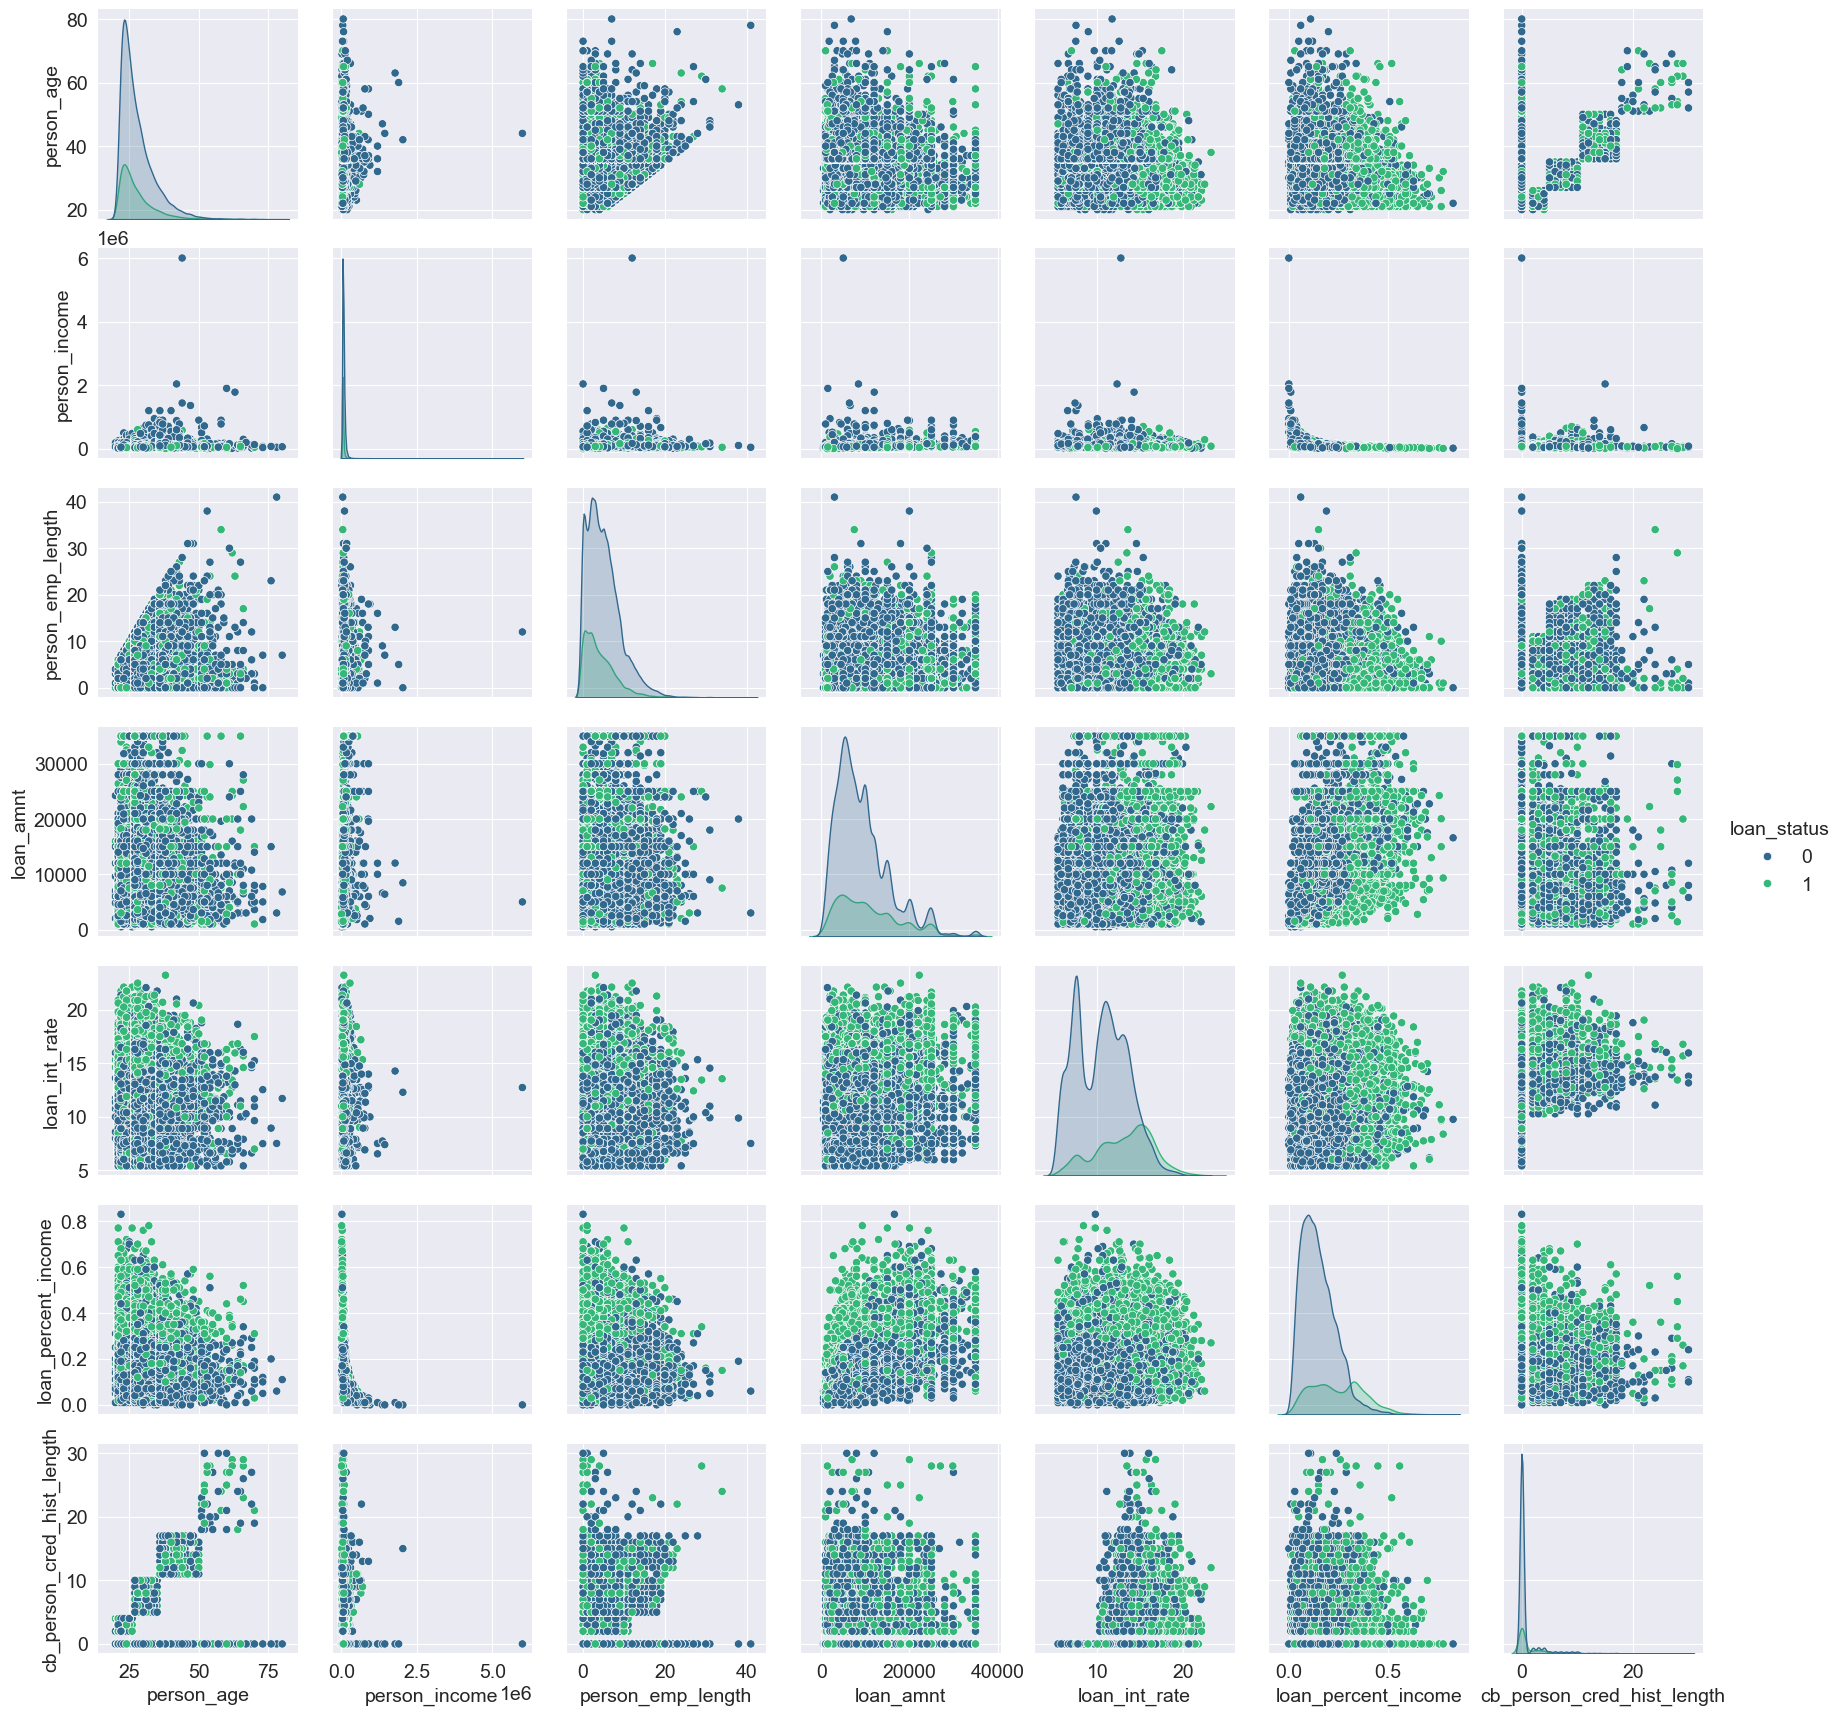

In [169]:
sns.pairplot(df_cr, hue = "loan_status", palette="viridis")
plt.show()

In [91]:
# # Scatter plots for each pair of variables

# fig = px.scatter_matrix(df_cr, dimensions= df_cr[num_col], color= df_cr["loan_status"])

# # Update layout and display the plot
# fig.update_layout(title='Pairplot of Data with Loan Status', width=1750, height=1750)
# fig.show()

In [168]:
num_col

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">4. Feature Engineering</div>

In [65]:
df_cr.head(5)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1


In [66]:
df_cr.isnull().sum()[df_cr.isnull().sum() > 0]

person_emp_length     876
loan_int_rate        3063
dtype: int64

Both columns have numrical data so null values can be fill by mean. On the basis of loan intent.

In [67]:
df_cr.groupby('loan_intent')['loan_int_rate'].mean()

loan_intent
DEBTCONSOLIDATION    11.005907
EDUCATION            10.974572
HOMEIMPROVEMENT      11.224372
MEDICAL              11.079688
PERSONAL             11.023615
VENTURE              10.971227
Name: loan_int_rate, dtype: float64

We can replace null values in the "loan interest rate" column with the mean value of 11. This mean value is calculated from the dataset, considering all categories.

In [68]:
df_cr["loan_int_rate"].fillna(df_cr["loan_int_rate"].mean(), inplace=True)

In [69]:
df_cr.groupby('loan_intent')['person_emp_length'].transform('mean')

0        4.881449
1        4.463857
2        4.765741
3        4.765741
4        4.765741
           ...   
32571    4.886076
32574    4.881449
32575    4.463857
32576    4.881449
32578    5.144714
Name: person_emp_length, Length: 32029, dtype: float64

In [70]:
pel_fill = round(df_cr.groupby('loan_intent')['person_emp_length'].mean(), 2)
pel_fill

loan_intent
DEBTCONSOLIDATION    4.75
EDUCATION            4.46
HOMEIMPROVEMENT      5.14
MEDICAL              4.77
PERSONAL             4.88
VENTURE              4.89
Name: person_emp_length, dtype: float64

In [71]:
mean_emp_length_by_intent = df_cr.groupby('loan_intent')['person_emp_length'].transform('mean')

# Fill null values with the mean 'person_emp_length' for each 'loan_intent' category
df_cr['person_emp_length'] = df_cr['person_emp_length'].fillna(mean_emp_length_by_intent)

# Round the values to 2 decimal places
df_cr['person_emp_length'] = df_cr['person_emp_length'].round(2)

In [72]:
df_cr

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32571,RENT,VENTURE,B,N,45600,60,1.0,20000,10.00,0,0.44,1
32574,RENT,PERSONAL,D,Y,65004,52,4.0,20000,15.58,19,0.31,1
32575,RENT,EDUCATION,B,N,64500,52,0.0,5000,11.26,0,0.08,0
32576,MORTGAGE,PERSONAL,C,N,53000,57,1.0,5800,13.16,0,0.11,0


In [73]:
df_cr.isnull().sum()[df_cr.isnull().sum() > 0]

Series([], dtype: int64)

In [74]:
df_cr['loan_status'].value_counts()

0    25009
1     7020
Name: loan_status, dtype: int64

In [75]:
df_cr.describe()

,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
count,3.202900e+04,32029.000000,32029.000000,32029.000000,32029.000000,32029.000000,32029.000000,32029.000000
mean,6.604990e+04,27.718692,4.786778,9594.017921,11.034793,1.046177,0.170258,0.219176
std,6.196703e+04,6.190740,4.088856,6327.037600,3.085335,2.826134,0.106790,0.413695
min,4.000000e+03,20.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000
25%,3.850000e+04,23.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,0.000000
50%,5.500000e+04,26.000000,4.000000,8000.000000,11.034793,0.000000,0.150000,0.000000
75%,7.944000e+04,30.000000,7.000000,12250.000000,13.160000,0.000000,0.230000,0.000000
max,6.000000e+06,94.000000,123.000000,35000.000000,23.220000,30.000000,0.830000,1.000000


In [76]:
df_cr.reset_index(drop = True, inplace=True)

In [77]:
df_cr[df_cr['person_age'] > 75]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
31816,RENT,MEDICAL,A,N,48000,78,41.0,3000,7.510000,0,0.06,0
31877,RENT,MEDICAL,C,N,24000,94,1.0,6500,11.034793,0,0.27,0
31883,RENT,MEDICAL,B,N,64000,80,7.0,6800,11.710000,0,0.11,0
31967,MORTGAGE,PERSONAL,A,N,94800,84,2.0,10000,7.510000,0,0.11,0
31995,RENT,MEDICAL,A,N,75000,76,23.0,15000,8.940000,0,0.20,0


In [78]:
# Dropping age above 75
df_cr = df_cr.drop(index = df_cr[df_cr['person_age'] > 75].index, axis=0)

In [79]:
df_cr.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1


In [80]:
df_cr[df_cr['person_emp_length']> 40]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
210,MORTGAGE,VENTURE,A,N,192000,21,123.0,20000,6.54,0,0.10,0


Droping these two rows because if someone age is 22 years how it is possible he/ she is working for last 123 years.

In [81]:
df_cr.drop(index = df_cr[df_cr['person_emp_length'] > 40].index, inplace=True)

In [82]:
df_cr

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1
5,OWN,VENTURE,A,N,9900,21,2.0,2500,7.14,0,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32024,RENT,VENTURE,B,N,45600,60,1.0,20000,10.00,0,0.44,1
32025,RENT,PERSONAL,D,Y,65004,52,4.0,20000,15.58,19,0.31,1
32026,RENT,EDUCATION,B,N,64500,52,0.0,5000,11.26,0,0.08,0
32027,MORTGAGE,PERSONAL,C,N,53000,57,1.0,5800,13.16,0,0.11,0


In [83]:
df_cr.reset_index(drop = True, inplace = True)

In [84]:
df_cr["cb_person_default_on_file"].value_counts(1)

N    0.821092
Y    0.178908
Name: cb_person_default_on_file, dtype: float64

In [85]:
df_cr.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file', 'person_income', 'person_age',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'cb_person_cred_hist_length', 'loan_percent_income', 'loan_status'],
      dtype='object')

In [86]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['loan_grade', 'person_home_ownership','loan_intent']
ord_col = ["cb_person_default_on_file"]

## Saving clean data into a csv file for futher use

In [87]:
# df_cr.to_csv("credit_risk_dataset_1.csv", index = False)

## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">5. Data Preprocessing</div>

In [88]:
X = df_cr.drop(columns= ['loan_status'])
y = df_cr['loan_status']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=12, stratify = y )
print(f"Shape of X train {X_train.shape}, X test {X_test.shape}")
print(f"Shape of Y train {y_train.shape}, Y test {y_test.shape}")

Shape of X train (24016, 11), X test (8006, 11)
Shape of Y train (24016,), Y test (8006,)


In [90]:
X_train.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file', 'person_income', 'person_age',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'cb_person_cred_hist_length', 'loan_percent_income'],
      dtype='object')

### Applying One Hot Encoder on categorical columns which have more than 2 category

In [91]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit and transform using a DataFrame
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_train.index)
temp_X_test = pd.DataFrame(ohe.transform(X_test[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_test.index)

# Concatenate the one-hot encoded features back to the original DataFrames
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_test = pd.concat([X_test, temp_X_test], axis=1)

In [92]:
X_train.sample(10)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
19503,RENT,VENTURE,C,Y,30000,30,1.0,3600,10.280000,10,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9574,RENT,EDUCATION,A,N,150000,22,2.0,8200,6.990000,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
15142,MORTGAGE,MEDICAL,C,N,124000,22,6.0,11000,11.034793,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8609,MORTGAGE,PERSONAL,B,N,59020,26,10.0,7000,10.000000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30134,RENT,MEDICAL,C,Y,51000,36,5.0,8000,13.470000,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
25927,MORTGAGE,DEBTCONSOLIDATION,A,N,99518,28,10.0,6500,5.990000,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9887,RENT,PERSONAL,A,N,45000,22,7.0,9000,7.900000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7555,MORTGAGE,PERSONAL,A,N,54000,22,3.0,15750,6.620000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1655,RENT,PERSONAL,D,N,14400,24,0.0,1600,18.250000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
31952,RENT,EDUCATION,A,N,105000,53,1.0,12000,6.910000,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [93]:
X_train.drop(columns = ohe_colums, inplace = True)
X_test.drop(columns = ohe_colums, inplace = True)

In [94]:
X_train.sample(5)

,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_grade_A,loan_grade_B,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
28280,N,110000,27,5.0,18000,9.910000,0,0.16,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21898,N,53200,32,13.0,5000,11.034793,0,0.09,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5112,N,43800,25,0.0,13000,10.380000,0,0.30,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
427,N,75000,24,9.0,24000,10.370000,0,0.32,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
25286,N,36000,32,3.0,5000,10.000000,0,0.14,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Applying Ordinal Encoder on a categorical column which have only 2 category

In [95]:
from sklearn.preprocessing import OrdinalEncoder

ore = OrdinalEncoder()

X_train["cb_person_default_on_file"] = ore.fit_transform(X_train[["cb_person_default_on_file"]])
X_test["cb_person_default_on_file"] = ore.transform(X_test[["cb_person_default_on_file"]])

In [96]:
X_train.shape

(24016, 25)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24016 entries, 18855 to 19697
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cb_person_default_on_file       24016 non-null  float64
 1   person_income                   24016 non-null  int64  
 2   person_age                      24016 non-null  int64  
 3   person_emp_length               24016 non-null  float64
 4   loan_amnt                       24016 non-null  int64  
 5   loan_int_rate                   24016 non-null  float64
 6   cb_person_cred_hist_length      24016 non-null  int64  
 7   loan_percent_income             24016 non-null  float64
 8   loan_grade_A                    24016 non-null  float64
 9   loan_grade_B                    24016 non-null  float64
 10  loan_grade_C                    24016 non-null  float64
 11  loan_grade_D                    24016 non-null  float64
 12  loan_grade_E                

In [98]:
y_train.value_counts(normalize=True)

0    0.780813
1    0.219187
Name: loan_status, dtype: float64

In [99]:
y_train.value_counts(1)

0    0.780813
1    0.219187
Name: loan_status, dtype: float64

Due to the highly imbalanced nature of our data, we will utilize the Synthetic Minority Over-sampling Technique (SMOTE) to address this issue. Currently, the ratio between the majority and minority classes is 78:22. After applying SMOTE, the ratio is expected to be adjusted to approximately 66:34.

In [100]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={1: 10000}, random_state=3)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [110]:
y_train_resampled.value_counts(1)

0    0.652312
1    0.347688
Name: loan_status, dtype: float64

In [102]:
X_train_resampled.duplicated().sum()

5

In [103]:
drop_index = X_train_resampled[X_train_resampled.duplicated()].index

In [104]:
X_train_resampled.drop(index = drop_index, inplace = True)
y_train_resampled.drop(index = drop_index, inplace = True)

In [105]:
y_train_resampled.value_counts(1)

0    0.652312
1    0.347688
Name: loan_status, dtype: float64

## Standardation

In [106]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_scaled= pd.DataFrame(std.fit_transform(X_train_resampled), columns=X_train_resampled.columns, index= X_train_resampled.index)
X_test_scaled= pd.DataFrame(std.transform(X_test), columns=X_test.columns, index= X_test.index)

## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">6. Machine Learning Classification Models</div>

In [107]:
# Importing classification report and confussion matrix

from sklearn.metrics import classification_report, confusion_matrix

### Function for confusion matrix

In [108]:
def confusion(y_test, y_pred):
    sns.set_theme(style= "whitegrid")
    plt.rcParams["figure.figsize"] = [5,3]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = "Actual"
    df_cm.columns.name = "Predicted"
    cm = sns.heatmap(df_cm,annot=True, fmt="g")
    cm.plot()

# <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">1. Logistic Regression</div>

### Create a LogisticRegression instance after SMOTE

Accuracy on train data 0.7497477997704108
Accuracy on test data 0.8126405196102923
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      6251
           1       0.61      0.41      0.49      1755

    accuracy                           0.81      8006
   macro avg       0.73      0.67      0.69      8006
weighted avg       0.80      0.81      0.80      8006



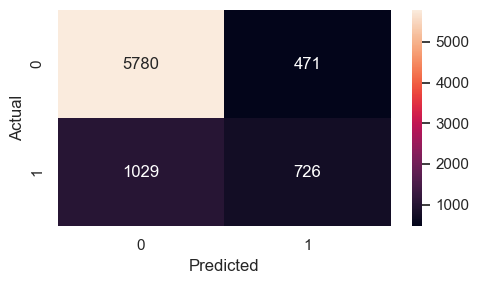

In [109]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(max_iter=1000, random_state=12)

lrg.fit(X_train_resampled, y_train_resampled)
y_pred_lrg = lrg.predict(X_test)

print(f"Accuracy on train data {lrg.score(X_train_resampled, y_train_resampled)}")
print(f"Accuracy on test data {lrg.score(X_test, y_test)}")

print(classification_report(y_test, y_pred_lrg))
confusion(y_test, y_pred_lrg)

### Create a LogisticRegression instance before SMOTE

Accuracy on train data 0.8025899400399733
Accuracy on test data 0.8011491381463902
              precision    recall  f1-score   support

           0       0.80      0.98      0.89      6251
           1       0.73      0.15      0.25      1755

    accuracy                           0.80      8006
   macro avg       0.77      0.57      0.57      8006
weighted avg       0.79      0.80      0.75      8006



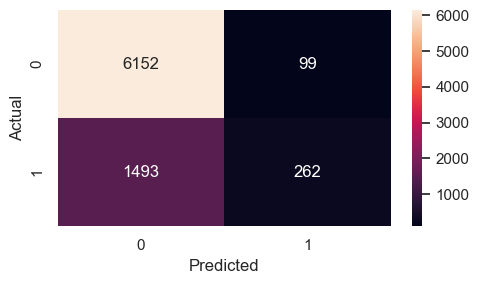

In [233]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(max_iter=67926, random_state=879)

lrg.fit(X_train, y_train)
y_pred_lrg = lrg.predict(X_test)

print(f"Accuracy on train data {lrg.score(X_train, y_train)}")
print(f"Accuracy on test data {lrg.score(X_test, y_test)}")

print(classification_report(y_test, y_pred_lrg))
confusion(y_test, y_pred_lrg)

### Create a LogisticRegression instance with hyperparameters

Accuracy on train data: 0.7497825860089748
Accuracy on test data: 0.8127654259305521
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      6251
           1       0.61      0.41      0.49      1755

    accuracy                           0.81      8006
   macro avg       0.73      0.67      0.69      8006
weighted avg       0.80      0.81      0.80      8006



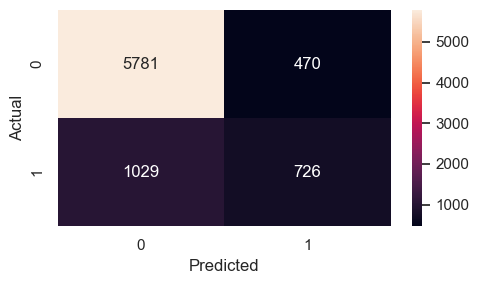

In [234]:
lr_1 = LogisticRegression(
    max_iter=56416,
    random_state=649,
    C=2.0,  # Adjust the regularization strength (default is 1.0)
    penalty='l1',  # Choose the regularization type ('l1', 'l2', 'elasticnet', or 'none')
    solver='saga',  # Choose the optimization algorithm
    fit_intercept=True,  # Allow an intercept term (True or False)
    l1_ratio = 0.5  # Assign class weights if dealing with imbalanced classes
)

lr_1.fit(X_train_resampled, y_train_resampled)
y_pred_lrg = lr_1.predict(X_test)

print(f"Accuracy on train data: {lr_1.score(X_train_resampled, y_train_resampled)}")
print(f"Accuracy on test data: {lr_1.score(X_test, y_test)}")

print(classification_report(y_test, y_pred_lrg))
confusion(y_test, y_pred_lrg)

### Logistic Regression with hyperparameter (before smote)

In [50]:
lr_1 = LogisticRegression(
    max_iter=56416,
    random_state=649,
    C=2.0,  # Adjust the regularization strength (default is 1.0)
    penalty='l1',  # Choose the regularization type ('l1', 'l2', 'elasticnet', or 'none')
    solver='saga',  # Choose the optimization algorithm
    fit_intercept=True,  # Allow an intercept term (True or False)
    class_weight="balanced",
    l1_ratio = 0.5  # Assign class weights if dealing with imbalanced classes
)

lr_1.fit(X_train, y_train)
y_pred_lrg = lr_1.predict(X_test)

print(f"Accuracy on train data: {lr_1.score(X_train, y_train)}")
print(f"Accuracy on test data: {lr_1.score(X_test, y_test)}")

print(classification_report(y_test, y_pred_lrg))
confusion(y_test, y_pred_lrg)

NameError: name 'LogisticRegression' is not defined

- Before applying SMOTE, the model achieved an accuracy of approximately 79.54% on the test data, with a precision of 0.53 for class 1 and 0.87 for class 0. However, after applying SMOTE, the accuracy increased to around 84.80% on the test data, with a precision of 0.68 for class 1 and 0.89 for class 0.
- Additionally, the recall and F1-score for class 1 also improved after applying SMOTE, indicating better performance in identifying instances of the minority class.
- Furthermore, when comparing the logistic regression model with hyperparameters and the logistic regression model with balanced class weights, we observe that the former achieved a higher accuracy on both the training and test data

## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">2. Decision Tree</div>

### Before Smote

 Accuracy on train data: 1.0
 Accuracy on test data: 0.8875843117661754
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6251
           1       0.73      0.76      0.75      1755

    accuracy                           0.89      8006
   macro avg       0.83      0.84      0.84      8006
weighted avg       0.89      0.89      0.89      8006



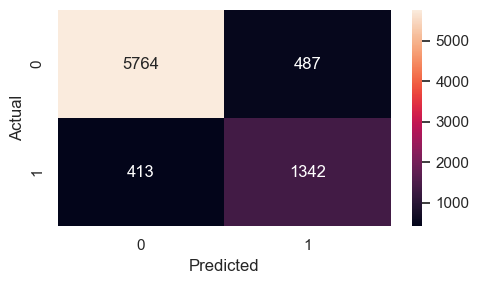

In [236]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=20)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
print(f" Accuracy on train data: {dtc.score(X_train, y_train)}")
print(f" Accuracy on test data: {dtc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_dtc))
confusion(y_test, y_pred_dtc)

### After Smote

 Accuracy on train data: 1.0
 Accuracy on test data: 0.8837122158381214
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6251
           1       0.72      0.76      0.74      1755

    accuracy                           0.88      8006
   macro avg       0.83      0.84      0.83      8006
weighted avg       0.89      0.88      0.88      8006



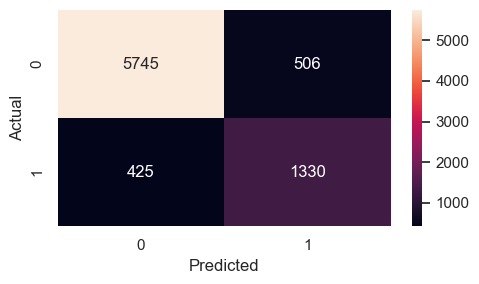

In [237]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=20)
dtc.fit(X_train_resampled, y_train_resampled)

y_pred_dtc = dtc.predict(X_test)
print(f" Accuracy on train data: {dtc.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data: {dtc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_dtc))
confusion(y_test, y_pred_dtc)

- The decision tree model shows clear signs of overfitting, as seen in its high accuracy on the training data but lower performance on the test data. 
- Even after addressing class imbalance with SMOTE, the overfitting issue persists. 
- Therefore, relying solely on the decision tree model may not be a suitable approach.

## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">3. Random Forest</div>

### Before Smote

 Accuracy on train data: 0.9999167221852099
 Accuracy on test data: 0.9340494629028229
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.98      0.72      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.95      0.86      0.89      8006
weighted avg       0.94      0.93      0.93      8006



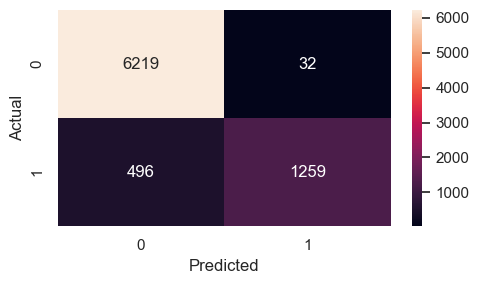

In [238]:
# Applying Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1008)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(f" Accuracy on train data: {rfc.score(X_train, y_train)}")
print(f" Accuracy on test data: {rfc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_rfc))
confusion(y_test, y_pred_rfc)

### After Smote

 Accuracy on train data: 0.999930427522872
 Accuracy on test data: 0.9340494629028229
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.97      0.72      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.95      0.86      0.89      8006
weighted avg       0.94      0.93      0.93      8006



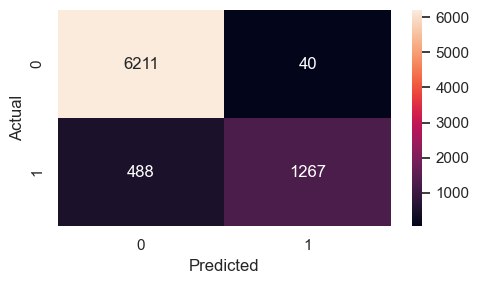

In [239]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1008)
rfc.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(X_test)
print(f" Accuracy on train data: {rfc.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data: {rfc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_rfc))
confusion(y_test, y_pred_rfc)

### Hyperparameter Tunning 

In [110]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2, 4, 6, 8, 10, 12, 16, 20, 22],
    "class_weight": ["balanced", "balanced_subsample"],
    "max_features": ["sqrt", "log2"]
    }

gs_rfc = GridSearchCV(estimator=rfc,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=4,
                           verbose=2)
gs_rfc.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt; total time=   0.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt; total time=   0.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt; total time=   0.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt; total time=   0.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=sqrt; total time=   0.7s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=log2; total time=   0.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=log2; total time=   0.7s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=log2; total time=   0.7s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, max_features=log2; total time=   0.6s
[CV] END class_weight=balanced, criterion=gini

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1008),
             n_jobs=4,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 16, 20, 22],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy', verbose=2)

In [111]:
# Taking best parameters 
gs_rfc.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt'}

### Applying Random Forest with best parameters


 Accuracy on train data: 0.981250217413991
 Accuracy on test data: 0.9340494629028229
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.97      0.72      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.95      0.86      0.89      8006
weighted avg       0.94      0.93      0.93      8006



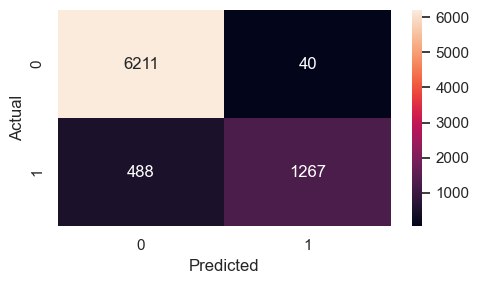

In [240]:
from sklearn.ensemble import RandomForestClassifier

rfc_1 = RandomForestClassifier(class_weight='balanced', criterion='gini',  max_depth=20, max_features= 'sqrt', random_state=14)
rfc_1.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(X_test)
print(f" Accuracy on train data: {rfc_1.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data: {rfc_1.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_rfc))
confusion(y_test, y_pred_rfc)

- Random forest applied to the data before SMOTE exhibited overfitting on the training data.
- After applying SMOTE, the random forest model showed improved performance compared to before SMOTE, with enhanced precision and recall metrics. However, the issue of overfitting persisted.
- Utilizing hyperparameters with the random forest model on SMOTE-treated data yielded similar results to the previous scenario, with slightly reduced accuracy on the training data compared to the test data. However, overfitting remained a concern.

## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">4. Extreme Gradient Boosting</div>

### After Smote

 Accuracy on train data: 0.9627091522593662
Accuracy on test_data = 0.9335498376217837
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.95      0.74      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.94      0.86      0.89      8006
weighted avg       0.93      0.93      0.93      8006



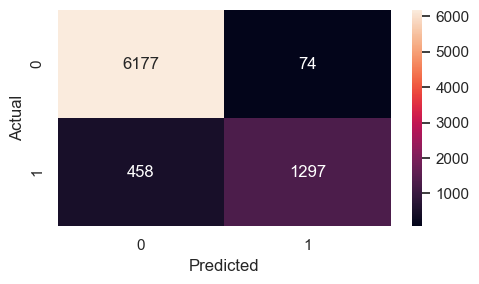

In [241]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

print(f" Accuracy on train data: {xgb.score(X_train_resampled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb.score(X_test, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

## <div style="border-radius:0px; border:#001B79 solid; padding: 15px; background-color: #B4D4FF; font-size:100%; text-align:center;color: #11235A;; font-weight: bold;">5. Support Vector Machine</div>

### Before smote

 Accuracy on train data 0.6156728847435043
 Accuracy on test data 0.613414938795903
              precision    recall  f1-score   support

           0       0.84      0.62      0.72      6251
           1       0.30      0.57      0.39      1755

    accuracy                           0.61      8006
   macro avg       0.57      0.60      0.56      8006
weighted avg       0.72      0.61      0.65      8006



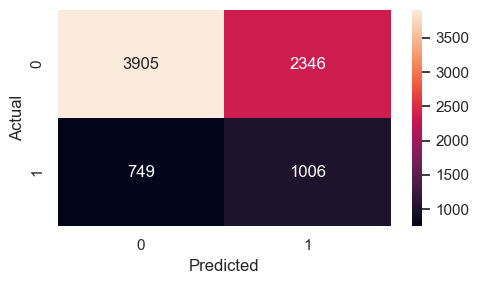

In [113]:
from sklearn.svm import SVC

svc = SVC(max_iter=100551, kernel="linear", random_state=108)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(f" Accuracy on train data {svc.score(X_train, y_train)}")
print(f" Accuracy on test data {svc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

### After Smote


 Accuracy on train data 0.56068459317494
 Accuracy on test data 0.780789407944042
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6251
           1       0.00      0.00      0.00      1755

    accuracy                           0.78      8006
   macro avg       0.39      0.50      0.44      8006
weighted avg       0.61      0.78      0.68      8006



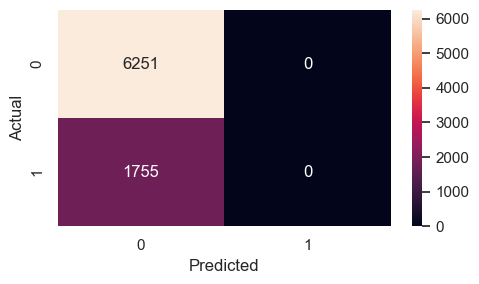

In [111]:
from sklearn.svm import SVC

svc = SVC(max_iter=100551, kernel="linear", random_state=108)

svc.fit(X_train_resampled, y_train_resampled)

y_pred = svc.predict(X_test_scaled)

print(f" Accuracy on train data {svc.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data {svc.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

## Applying important columns on different columns

In [245]:
# Feature Important from Random Forest
rfc.feature_importances_

array([0.03512941, 0.11546207, 0.04428525, 0.05765921, 0.0840158 ,
       0.19875404, 0.01374921, 0.02764786, 0.02063365, 0.02243207,
       0.0148042 , 0.03920275, 0.08327927, 0.01801237, 0.00407911,
       0.00200715, 0.0412312 , 0.00042603, 0.01584341, 0.07370125,
       0.02096267, 0.01320136, 0.01562601, 0.01748325, 0.00982478,
       0.01054663])

In [250]:
imp_rfc_col = rfc.feature_names_in_

In [251]:
X_train_imp = X_train_resampled[imp_rfc_col]
X_test_imp = X_test[imp_rfc_col]

In [252]:
X_train_imp_out = X_train[imp_rfc_col]
X_test_imp = X_test[imp_rfc_col]

In [253]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1008)
rfc.fit(X_train_imp, y_train_resampled)
y_pred_rfc_imp = rfc.predict(X_test_imp)
print(f" Accuracy on train data: {rfc.score(X_train_imp, y_train_resampled)}")
print(f" Accuracy on test data: {rfc.score(X_test_imp, y_test)}")
print(classification_report(y_test, y_pred_rfc_imp))

 Accuracy on train data: 0.999930427522872
 Accuracy on test data: 0.9340494629028229
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.97      0.72      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.95      0.86      0.89      8006
weighted avg       0.94      0.93      0.93      8006



There is no difference betwwen the accuracy and f1 score of random forest between important columns.

### Trying Logistic Regression with important columns

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_1 = LogisticRegression(max_iter=18165, random_state=45)
lr_1.fit(X_train_imp, y_train_resampled)

y_pred_std = lr_1.predict(X_test_imp)
print(f" Accuracy on train data {lr_1.score(X_train_imp, y_train_resampled)}")
print(f" Accuracy on test data {lr_1.score(X_test_imp, y_test)}")
print(classification_report(y_test, y_pred_std))

 Accuracy on train data 0.7497477997704108
 Accuracy on test data 0.8126405196102923
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      6251
           1       0.61      0.41      0.49      1755

    accuracy                           0.81      8006
   macro avg       0.73      0.67      0.69      8006
weighted avg       0.80      0.81      0.80      8006



### Trying SVC with important columns

In [255]:
from sklearn.svm import SVC

svc = SVC(max_iter=100551, kernel="linear", random_state=108)

svc.fit(X_train_imp, y_train_resampled)

y_pred = svc.predict(X_test_imp)

print(f" Accuracy on train data {svc.score(X_train_imp, y_train_resampled)}")
print(f" Accuracy on test data {svc.score(X_test_imp, y_test)}")
print(classification_report(y_test, y_pred))

 Accuracy on train data 0.46192646189167563
 Accuracy on test data 0.3568573569822633
              precision    recall  f1-score   support

           0       0.93      0.19      0.32      6251
           1       0.25      0.95      0.39      1755

    accuracy                           0.36      8006
   macro avg       0.59      0.57      0.35      8006
weighted avg       0.78      0.36      0.33      8006



### Trying XGBoost with important columns

In [256]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20)
xgb.fit(X_train_imp, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_imp)

print(f" Accuracy on train data: {xgb.score(X_train_imp, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb.score(X_test_imp, y_test)}')
print(classification_report(y_test, y_pred_xgb))

 Accuracy on train data: 0.9627091522593662
Accuracy on test_data = 0.9335498376217837
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.95      0.74      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.94      0.86      0.89      8006
weighted avg       0.93      0.93      0.93      8006



- XGBoost demonstrates favorable outcomes on data post-SMOTE, showcasing high accuracy, a commendable F1 score, and well-balanced precision and recall.
- Thus, considering XGBoost for further analysis appears promising.
- Hyperparameter tuning for XGBoost is being carried out in a separate file.